<a href="https://colab.research.google.com/github/swarathesh/COVID/blob/master/covid_19_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 Classifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/dataset/

/content/drive/My Drive/dataset


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load the dataset 

In [ ]:
img_width, img_height = 150, 150

train_data_dir = '/content/drive/My Drive/dataset/co/chest_xray/chest_xray/train'
validation_data_dir = '/content/drive/My Drive/dataset/co/chest_xray/chest_xray/test'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 60
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# Data Augumentation

* Train dataset parameters

```
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
```

* Test dataset parameters



```
    rescale=1. / 255
```




In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 5127 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
  )

model.save_weights('cnn.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
125/125 [==============================] - 914s 7s/step - loss: 0.5580 - accuracy: 0.7380 - val_loss: 0.4148 - val_accuracy: 0.7901
Epoch 2/10
125/125 [==============================] - 406s 3s/step - loss: 0.3636 - accuracy: 0.8255 - val_loss: 0.4539 - val_accuracy: 0.7965
Epoch 3/10
125/125 [==============================] - 273s 2s/step - loss: 0.3463 - accuracy: 0.8615 - val_loss: 0.5135 - val_accuracy: 0.7933
Epoch 4/10
125/125 [==============================] - 177s 1s/step - loss: 0.2939 - accuracy: 0.8865 - val_loss: 0.3595 - val_accuracy: 0.8574
Epoch 5/10
125/125 [==============================] - 118s 946ms/step - loss: 0.2800 - accuracy: 0.8935 - val_loss: 0.3908 - val_accuracy: 0.8157
Epoch 6/10
125/125 [==============================] - 85s 682ms/step - loss: 0.2614 - accuracy: 0.8950 - val_loss: 0.3090 - val_accuracy: 0.8718
Epoch 7/10
125/125 [==============================] - 67s 538

In [ ]:
from matplotlib import pyplot
def cm(model,history):
 scores = model.evaluate_generator(validation_generator) 
 print("Accuracy = ", scores[1])
 pyplot.plot(history.history['loss'], label='train')
 pyplot.plot(history.history['val_loss'], label='test')
 pyplot.legend()
 pyplot.show()
 predictions = model.predict_generator(validation_generator)
 predicted_classes = np.argmax(predictions, axis=1)
 true_classes = validation_generator.classes
 class_labels = list(validation_generator.class_indices.keys())  
 cm = confusion_matrix(true_classes, predicted_classes)
 df = pd.DataFrame(cm)
 plt.figure()
 sn.heatmap(df, annot=True)
 plt.show()  

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy =  0.8221153616905212


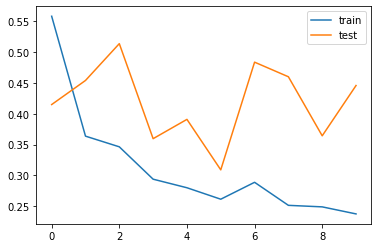

Instructions for updating:
Please use Model.predict, which supports generators.


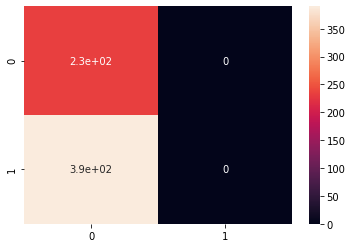

In [ ]:
cm(model,history)

# Transfer Learning using Incerption V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
  )

model.save_weights('inception.h5')

Epoch 1/10
125/125 [==============================] - 39s 311ms/step - loss: 0.5286 - acc: 0.7443 - val_loss: 0.8798 - val_acc: 0.6250
Epoch 2/10
125/125 [==============================] - 41s 329ms/step - loss: 0.4725 - acc: 0.7660 - val_loss: 0.5833 - val_acc: 0.6603
Epoch 3/10
125/125 [==============================] - 39s 309ms/step - loss: 0.4518 - acc: 0.7745 - val_loss: 0.4482 - val_acc: 0.7837
Epoch 4/10
125/125 [==============================] - 38s 307ms/step - loss: 0.4303 - acc: 0.7905 - val_loss: 0.5597 - val_acc: 0.6971
Epoch 5/10
125/125 [==============================] - 38s 302ms/step - loss: 0.4115 - acc: 0.8031 - val_loss: 0.4967 - val_acc: 0.7340
Epoch 6/10
125/125 [==============================] - 38s 308ms/step - loss: 0.4016 - acc: 0.8045 - val_loss: 0.4241 - val_acc: 0.7965
Epoch 7/10
125/125 [==============================] - 38s 303ms/step - loss: 0.3614 - acc: 0.8370 - val_loss: 0.5292 - val_acc: 0.7051
Epoch 8/10
125/125 [==============================] - 3

Accuracy =  0.7612179517745972


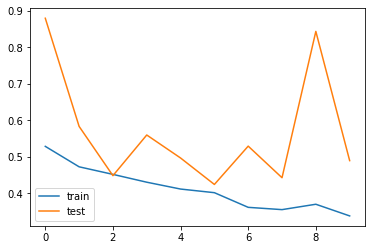

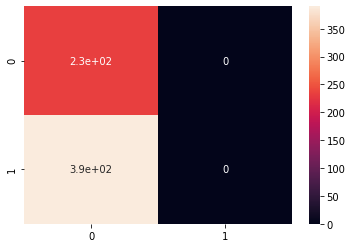

In [ ]:
cm(model,history)

# VGG16 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16


In [ ]:
pre_trained_model = VGG16(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
  )

model.save_weights('vgg15.h5')

Epoch 1/10
125/125 [==============================] - 37s 296ms/step - loss: 0.2685 - acc: 0.8905 - val_loss: 0.2741 - val_acc: 0.8862
Epoch 2/10
125/125 [==============================] - 37s 298ms/step - loss: 0.1659 - acc: 0.9370 - val_loss: 0.2506 - val_acc: 0.9038
Epoch 3/10
125/125 [==============================] - 37s 297ms/step - loss: 0.1636 - acc: 0.9355 - val_loss: 0.2984 - val_acc: 0.9006
Epoch 4/10
125/125 [==============================] - 37s 295ms/step - loss: 0.1521 - acc: 0.9480 - val_loss: 0.2753 - val_acc: 0.9071
Epoch 5/10
125/125 [==============================] - 37s 297ms/step - loss: 0.1330 - acc: 0.9450 - val_loss: 0.5498 - val_acc: 0.8381
Epoch 6/10
125/125 [==============================] - 38s 301ms/step - loss: 0.1584 - acc: 0.9377 - val_loss: 0.2243 - val_acc: 0.9231
Epoch 7/10
125/125 [==============================] - 37s 295ms/step - loss: 0.1445 - acc: 0.9463 - val_loss: 0.2361 - val_acc: 0.9199
Epoch 8/10
125/125 [==============================] - 3

Accuracy =  0.9118589758872986


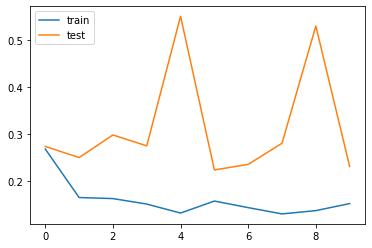

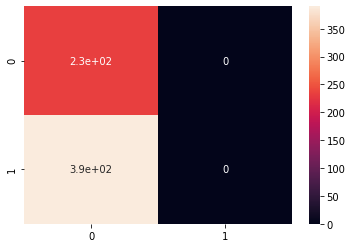

In [ ]:
cm(model,history)

# ResNet50

In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
pre_trained_model = ResNet50(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
  )

model.save_weights('vgg15.h5')

Epoch 1/10
125/125 [==============================] - 38s 306ms/step - loss: 0.6894 - acc: 0.6820 - val_loss: 0.8675 - val_acc: 0.6250
Epoch 2/10
125/125 [==============================] - 37s 296ms/step - loss: 0.5312 - acc: 0.7450 - val_loss: 0.7977 - val_acc: 0.6250
Epoch 3/10
125/125 [==============================] - 38s 301ms/step - loss: 0.4992 - acc: 0.7615 - val_loss: 0.5774 - val_acc: 0.6651
Epoch 4/10
125/125 [==============================] - 38s 301ms/step - loss: 0.4599 - acc: 0.7805 - val_loss: 0.5469 - val_acc: 0.6843
Epoch 5/10
125/125 [==============================] - 37s 296ms/step - loss: 0.4073 - acc: 0.8030 - val_loss: 0.6062 - val_acc: 0.6747
Epoch 6/10
125/125 [==============================] - 37s 299ms/step - loss: 0.3848 - acc: 0.8180 - val_loss: 0.8234 - val_acc: 0.6362
Epoch 7/10
125/125 [==============================] - 38s 305ms/step - loss: 0.3857 - acc: 0.8180 - val_loss: 0.4108 - val_acc: 0.8077
Epoch 8/10
125/125 [==============================] - 3

Accuracy =  0.817307710647583


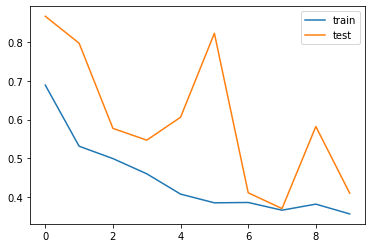

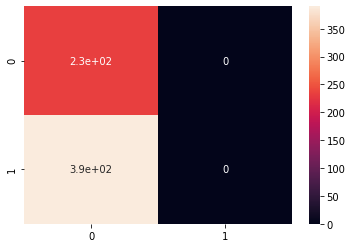

In [ ]:
cm(model,history)